In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('background.csv')
display(df.head())
display(df.describe())
display(df.groupby('cyan').mean(numeric_only=True))

,id,cyan,time
0,NYP,0,859
1,HDR,1,462
2,CJK,0,559
3,LYN,1,971
4,ZGQ,0,742


,cyan,time
count,35.000000,35.000000
mean,0.514286,670.028571
std,0.507093,180.151813
min,0.000000,291.000000
25%,0.000000,521.500000
50%,1.000000,675.000000
75%,1.000000,833.000000
max,1.000000,1005.000000


,time
cyan,
0,679.647059
1,660.944444


In [31]:
from scipy import stats
cyan_1 = df['time'][df['cyan'] == 1]
cyan_0 = df['time'][df['cyan'] == 0]
t_stat, p_value = stats.ttest_ind(cyan_1, cyan_0)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -0.3028381095187076, P-value: 0.7639140668750091


18
35


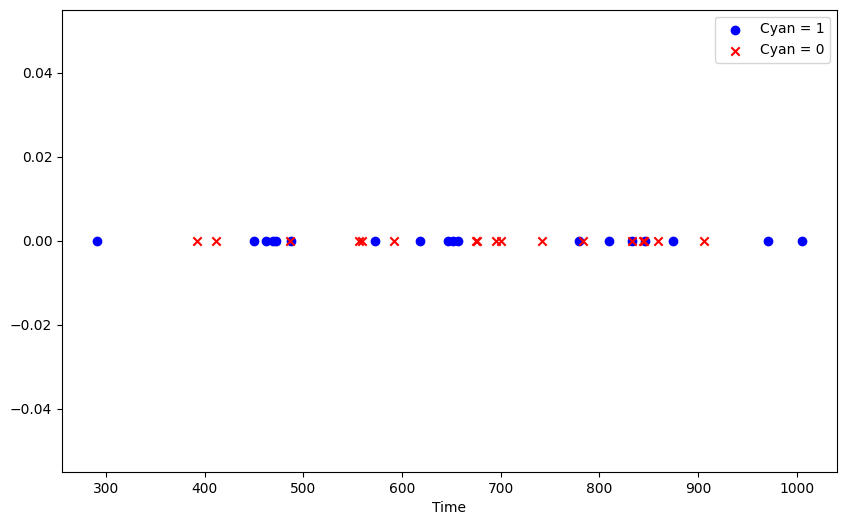

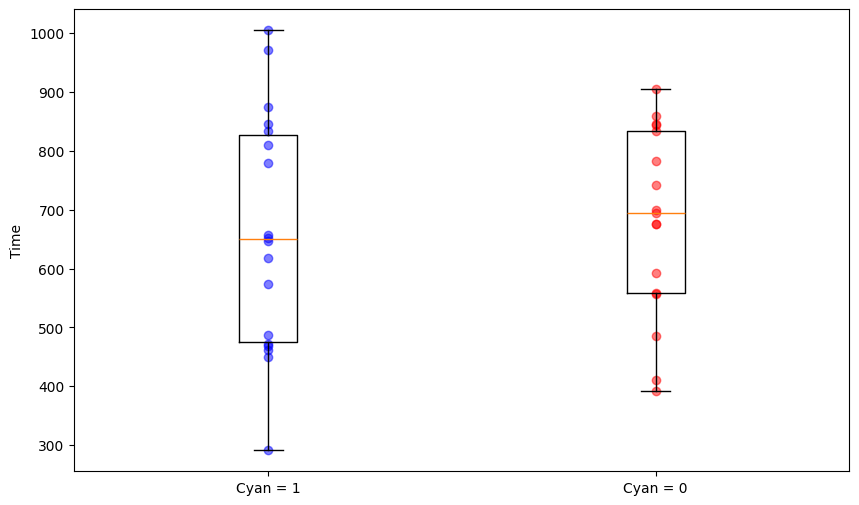

In [32]:
plt.figure(figsize=(10, 6))
print(len(df['time'][df['cyan'] == 1]))
print(len([1 for _ in range(len(df['cyan'] == 1))]))
plt.scatter(df['time'][df['cyan'] == 1], [0 for _ in range(sum(df['cyan'] == 1))], label='Cyan = 1', color='blue', marker='o')
plt.scatter(df['time'][df['cyan'] == 0], [0 for _ in range(sum(df['cyan'] == 0))], label='Cyan = 0', color='red', marker='x')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([df['time'][df['cyan'] == 1], df['time'][df['cyan'] == 0]], tick_labels=['Cyan = 1', 'Cyan = 0'])
plt.scatter([1 for _ in range(len(df['time'][df['cyan'] == 1]))], df['time'][df['cyan'] == 1], color='blue', alpha=0.5)
plt.scatter([2 for _ in range(len(df['time'][df['cyan'] == 0]))], df['time'][df['cyan'] == 0], color='red', alpha=0.5)
plt.ylabel('Time')
plt.show()